In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
# pd.set_option('display.max_rows', 100)


## Install_csv and EDA

In [72]:
installs_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\installs.csv')
len(installs_df)

216888

In [73]:
installs_df['month'] = pd.DatetimeIndex(installs_df['event_date']).month
installs_df['month_name'] = installs_df['month'].apply(lambda x: calendar.month_abbr[x])

In [74]:
installs_df.sample(10)

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,month_name
121616,17f2f2f51123de04df565ad6f9494acb605befbb10f1ef...,1,121,60,2022-03-02,11,3,Mar
120637,3dddc692e40ce0cb588431b9df92db9bd232a8115bc154...,109,174,60,2022-02-28,11,2,Feb
80529,fbeae04d73715b84f3b78a49476d722cc888cc8248578a...,1,321,26,2022-11-05,12,11,Nov
4979,414bc20eeeb811f4fb0c1ba02c39f0819a215aca53850f...,1,94,10,2022-10-29,11,10,Oct
67385,7fd78d09971d0d61b222669baf5392a1857c72e3e792c9...,1,94,10,2022-10-06,12,10,Oct
28608,99da380fe0f7cc656712936f440c8c99227974a43608b6...,109,121,60,2022-10-12,11,10,Oct
203440,80321fcf435a61ae048558c617ba25b78c91f18a243546...,17,370,26,2022-08-19,10,8,Aug
30305,50b1935bc977c77a6434321af1162f206788328a1c794b...,1,94,60,2022-12-08,12,12,Dec
67745,de8a3b4fc64a17f8be639c1359d575cc50f6682b28a564...,109,189,60,2022-05-17,11,5,May
41594,369f1a73cc756556acc9828a7395a56a87af1ca542ed43...,1,277,1111,2022-11-02,15.6.1,11,Nov


In [92]:
country_month_installs.to_csv('country_month_installation_breakdown.csv')

In [75]:
# installs_df.country_id.tolist()
country_month_installs = installs_df.groupby(['country_id','month','month_name'])['install_id'].size()\
                        .sort_values(ascending=True).reset_index(name='installs_per_country')
country_month_installs.sort_values(by=['month'])

,country_id,month,month_name,installs_per_country
21,213,1,Jan,1637
38,109,1,Jan,8322
7,17,1,Jan,358
41,1,1,Jan,10907
20,213,2,Feb,1376
3,17,2,Feb,322
27,109,2,Feb,4229
40,1,2,Feb,8889
37,1,3,Mar,8137
18,213,3,Mar,862


In [85]:
order_month = pd.value_counts(country_month_installs['month_name']).sort_index().index


In [86]:
order_month

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

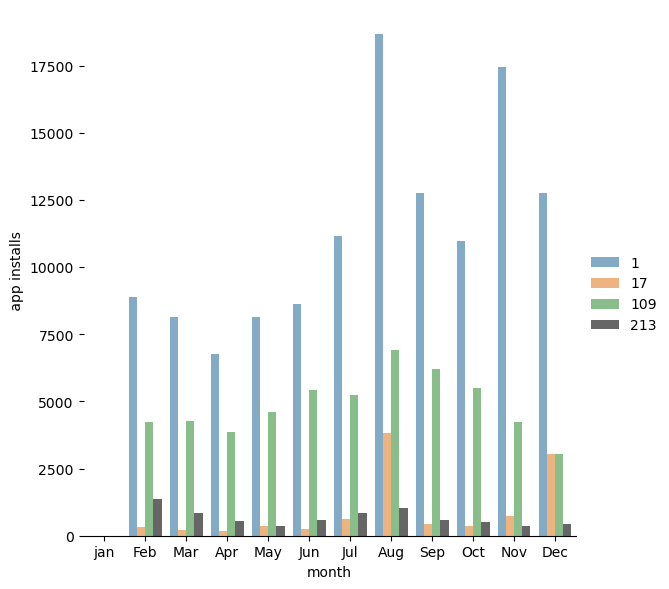

In [91]:
g = sns.catplot(
    data=country_month_installs, kind="bar",
    x="month_name", y="installs_per_country", hue="country_id",
    palette=["C0", "C1", "C2", "k"], alpha=.6, height=6,order=['jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
g.despine(left=True)
g.set_axis_labels("month", " app installs")
g.legend.set_title("")

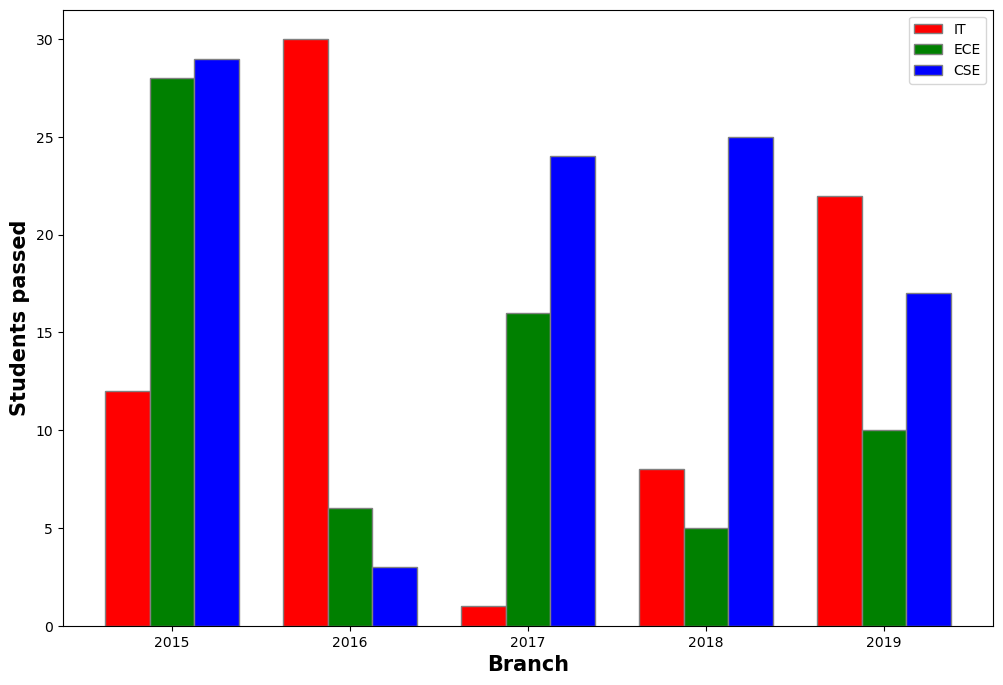

In [41]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]

ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()

In [6]:
installs_per_con_per_app_per_net = installs_df.groupby(['country_id','app_id','network_id']).agg({'install_id': ['count']})\
                         .rename(columns={'install_id':'install_count'})\
                         .sort_values(ascending=False,by=['country_id','app_id','network_id']).reset_index()
installs_per_con_per_app_per_net

,country_id,app_id,network_id,install_count
,,,,count
0,213,405,26,1
1,213,404,26,2
2,213,402,26,4
3,213,390,26,5
4,213,380,26,40
...,...,...,...,...
290,1,73,26,539
291,1,73,10,221
292,1,71,60,4322


In [7]:
install_app = installs_df.groupby(['install_id','app_id']).agg({'install_id': ['count'],'app_id':['count']})\
                         .rename(columns={'install_id':'install_count','app_id':'app_count'})\
                         .sort_values(ascending=False,by=['app_id']).reset_index()
install_app

,install_id,app_id,install_count,app_count
,,,count,count
0,9d6f82d11e310d98b90348715087fd9aa1e5f3e8cff30e...,408,1,1
1,bc68c44ff8662aad8d9e67dd84675ab211efaaf19ce747...,408,1,1
2,ef13609c277f22cf0831e219983bc84be61978528a11a8...,408,1,1
3,51c1061de7998c3a35141ed3ba4b06a1b7af240d842cd3...,408,1,1
4,bc974875a4964721951d3af72bf74bf58606b62b9bba4c...,408,1,1
...,...,...,...,...
216882,b0004a3d17057319223b7ca102d646ab584f29a58aacad...,71,1,1
216883,1219c3b3a8628e50199e174a978a2d6609d4577ef04241...,71,1,1
216884,1219656bd87400dfaa9469aece07cb054186dc7a83bb35...,71,1,1


In [8]:
installs_df.event_date.sort_values()

193106    2022-01-01
124603    2022-01-01
186286    2022-01-01
183117    2022-01-01
207947    2022-01-01
             ...    
23307     2022-12-31
30729     2022-12-31
184373    2022-12-31
209197    2022-12-31
30908     2022-12-31
Name: event_date, Length: 216888, dtype: object

In [12]:
installs_df.groupby(['event_date']).size().sort_values(ascending=False)

event_date
2022-08-26    1430
2022-08-21    1392
2022-08-20    1182
2022-08-22    1172
2022-08-07    1168
              ... 
2022-05-03     319
2022-05-05     318
2022-04-28     314
2022-04-21     313
2022-04-14     283
Length: 365, dtype: int64

In [10]:
install_per_country = installs_df.groupby(['country_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_country')
install_per_country

,country_id,installs_per_country
0,1,135242
1,109,61841
2,17,10671
3,213,9134


In [11]:
device_os = installs_df.groupby(['device_os_version']).size().sort_values(ascending=False).reset_index(name='count_per_os_version')
device_os

,device_os_version,count_per_os_version
0,11,79355
1,12,56679
2,10,45660
3,9,16285
4,8.0.0,5736
...,...,...
76,15.1.1,1
77,4.9.77+,1
78,4.9.227-22722052,1
79,4.9.227-21443963,1


In [10]:
network = installs_df.groupby(['network_id']).size().sort_values(ascending=False).reset_index(name='networks_counts')

In [11]:
network

,network_id,networks_counts
0,60,110463
1,26,73979
2,10,26345
3,1111,6101


In [12]:
install_per_country.dtypes

country_id              int64
installs_per_country    int64
dtype: object

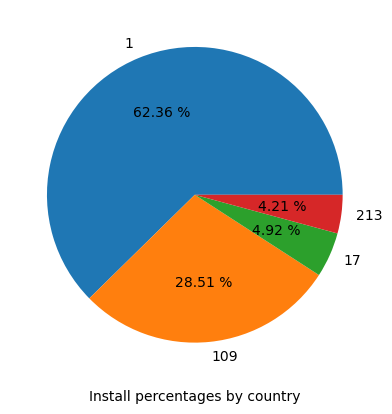

In [38]:
plt.pie(x="installs_per_country",labels="country_id", data=install_per_country, autopct="%.2f %%")
plt.xlabel("Install percentages by country")
plt.show()

In [14]:
installs_df.groupby(['app_id']).size().sort_values(ascending=False).reset_index(name='app_count_per_id')

,app_id,app_count_per_id
0,174,47416
1,121,39868
2,94,32265
3,189,10082
4,71,8300
5,122,7955
6,154,7694
7,97,7370
8,256,6184
9,104,5286


In [15]:
installs_df.groupby(['install_id']).size().sort_values(ascending=False).reset_index(name='install_count')

,install_id,install_count
0,1c58d3e7cabdedd63737a5e99b7ccc27c42e47cbb85b74...,2
1,0000489f6697ab477e9fae03ab0edc6eb6c79e30c9675f...,1
2,ab364f5872942656c0c459fc15bb9245db0c3e9a1f0bdb...,1
3,ab34384c875c702dccfa12523ad5cc9fe28abec68aaa25...,1
4,ab34a2823057dbbd154b8d502c1334dd928af48641c043...,1
...,...,...
216882,557957562b48e043efdeac39428df17e68a07b343184b7...,1
216883,557a2fb115d359daf5f7608c405da61fc8927c1c839838...,1
216884,557a4162faf08e19811578c0f3a3818895c58a5c0f59f7...,1
216885,557a42ede81d95323bcb55c0767329c14c66c01364245e...,1


In [16]:
# installs_df['install_id'].nunique(),installs_df['app_id'].nunique()
install_per_app_count = installs_df.groupby(['app_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_app_count')
install_per_app_count

,app_id,installs_per_app_count
0,174,47416
1,121,39868
2,94,32265
3,189,10082
4,71,8300
5,122,7955
6,154,7694
7,97,7370
8,256,6184
9,104,5286


In [17]:
install_per_network = installs_df.groupby(['network_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_network')
install_per_network

,network_id,installs_per_network
0,60,110463
1,26,73979
2,10,26345
3,1111,6101


#### Summary of Installs_csv

- There are 51 unique apps in install_csv
- There are 4 countries where apps were installed
- There are 4 unique mobile ad networks
- There are 81 mobile os
- There were 216877 number of installations
- App Id 174 tops in being installed the most with 47416
- Network Id 60 has the most count 110463

## Revenue

In [29]:
revenue_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\revenue.csv')

In [30]:
revenue_df.head()

,install_id,event_date,value_usd
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400


In [31]:
revenue_df.event_date.min(),revenue_df.event_date.max()

('2022-01-01', '2022-12-31')

In [36]:
# revenue_df.groupby(["event_date"]).size().sort_values(ascending=False)
installs_df.groupby(['event_date'])
# .size().sort_values(ascending=True)

In [20]:
# Top 20 installs by their revenue sum
revenue_df.groupby(["install_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='revenue_sum').head(20)

,install_id,revenue_sum
0,b18e32862277cef10fc4f9956671506a888ac19492a0ad...,133.430000
1,ea6b90cc2d2f7e5fcf16eb5b8832111757f1f8f85ab3e7...,95.824843
2,3d5869a49129728cc6086b0d0e9b7d2aa98c4e597e4614...,90.628147
3,3f885b64b8c190673d5c1ee17ffb881c934a6c5cf4c079...,90.413146
4,58386b3403601d1895438ef3fd38279e23db746540bee9...,86.049419
5,c1aa5dda50f680762f24e1961191aee180e3940d4149de...,85.320585
6,f31f1023ac055d4bec20567216c3d2e4251c51fb51c461...,84.515213
7,b04f7c8bc33ef4e6acbbe05f0a2225ba936f50ce9f525d...,83.710000
8,8ef2c9e1f6ef0b07c66a88ec741ad8b2b9ec283838de7e...,82.491656
9,0a2a0fa90cf5dd6ebaa7dd58b23c1d012ead9ad651b90b...,81.530000


#### Joining revenue data with installs data

In [21]:
revenue_install_df = pd.merge(installs_df,revenue_df,on=['install_id','event_date'])

In [22]:
len(revenue_install_df)

1004748

In [23]:
revenue_install_df.head()

,install_id,country_id,app_id,network_id,event_date,device_os_version,value_usd
0,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,2.000000e-03
1,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,2.190000e-03
2,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,4.999999e-04
3,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,5.252659e-12
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,-9.499490e-11


In [24]:
revenue_install_df.groupby(["install_id","country_id","app_id","network_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='revenue_sum')

,install_id,country_id,app_id,network_id,revenue_sum
0,097b9f17ee48a7e6a3bb8beea6f4444e69fec7cbf84d25...,1,121,26,5.697000e+01
1,42ef6c6122e94cfbb3e733bd0cd9183b41fdcf86fc8556...,1,94,60,5.686000e+01
2,f411e3f29656d495f989d4e37399a52f13818d8ff8f9c9...,1,94,10,5.625000e+01
3,c057b83e56e0abda73aa9282a15902bca7f3a9e951105d...,1,94,26,5.603000e+01
4,1638648a5a15c419e6f50de65679b544058b153c715668...,1,94,10,5.400000e+01
...,...,...,...,...,...
74652,08657777fd0c45f583a3eb033b9408f1b1e68446cae457...,213,189,60,-2.000000e-10
74653,f52108164c0d08bc71ce7c6609cb7809064038a70435ce...,17,237,26,-3.000000e-10
74654,fa7f1704f15fda4f6c33c3787301431f4be6bf83881a8c...,17,237,26,-4.000000e-10
74655,a4edb140df238a8fcb96be99d625b3cf52563c0c05b167...,109,219,26,-5.000000e-10


In [25]:
revenue_install_df.event_date.min(),revenue_install_df.event_date.max()

('2022-01-01', '2022-12-31')

## Adspend

In [26]:
adspend_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\adspend.csv')
adspend_df.head()

,event_date,country_id,network_id,client_id,value_usd
0,2022-01-01,1,10,71,4.680000
1,2022-01-01,1,10,94,223.439997
2,2022-01-01,1,10,104,0.800000
3,2022-01-01,1,10,121,4.870000
4,2022-01-01,1,10,174,1.300000


In [27]:
adspend_df.groupby(["country_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_sum_per_country')

,country_id,adspend_sum_per_country
0,1,243186.687782
1,109,10053.718011
2,213,501.178006
3,17,334.392000


In [28]:
adspend_df.groupby(["client_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_sum_per_client')

,client_id,adspend_sum_per_client
0,174,104606.688250
1,94,71636.985414
2,121,42158.106030
3,71,11021.333005
4,189,4474.769952
5,104,3187.530988
6,256,2968.805070
7,302,2631.670026
8,275,1998.470014
9,380,1764.217032


In [29]:
adspend_df.groupby(["network_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_sum_per_network')

,network_id,adspend_sum_per_network
0,60,214838.614914
1,10,39237.360885


## Payout

In [30]:
payouts_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\payouts.csv')
payouts_df.head()

,install_id,event_date,value_usd
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376
1,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,2022-12-28,0.361216
2,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.359006
3,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416
4,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416


#### Joining revenue with payout

In [31]:
revenue_payout_df = pd.merge(payouts_df,revenue_df,on=['install_id','event_date'],suffixes=('_payout','_revenue'))

In [32]:
revenue_payout_df

,install_id,event_date,value_usd_payout,value_usd_revenue
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376,0.76
1,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376,1.17
2,5d1ce288f9dbc98745bb235b3ffd32a0cf906fcdb52e7b...,2022-12-05,0.358292,1.08
3,f4cd839669220bdad4a5e9a166d424ec02c45d4ede3bb6...,2022-12-21,0.360366,0.54
4,af81e3ac1841ab9493640a559c44821d4bd1f1a610262e...,2022-12-04,0.706046,3.15
...,...,...,...,...
34174,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,2022-01-27,0.383418,0.73
34175,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757368,3.15
34176,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757368,3.15
34177,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.384336,3.15
